In [2]:
from googleapiclient.discovery import build
import requests
import json
from pprint import pprint
import time
import pandas as pd
import glob
import pdb
import functools
import numpy as np
import itertools
import pyranges as pr
import pysam
import re
import seaborn as sns
import matplotlib.pyplot as plt
from google.cloud import storage
import pathlib
from matplotlib.backends.backend_pdf import PdfPages
from pandas.api.types import CategoricalDtype
from pandas.api.types import is_numeric_dtype
from pathlib import Path
from matplotlib.backends.backend_pdf import PdfPages


In [3]:
# def smoothDensity(inDF, binSize=3):
#     inDFSorted = inDF.sort_values("Intervals")
#     numEntries = len(inDFSorted)
#     densityArray = inDF['% Density'].to_numpy()
#     outArray = np.zeros(len(densityArray))
#     for i in range(numEntries - binSize + 1):
# #         print(densityArray[i: i + 3])
#         tempMedian = np.median(densityArray[i: i + binSize])
#         outArray[i] = tempMedian
#     pdb.set_trace()
#     outSeries = pd.Series(outArray)
#     return outSeries

# def smoothDensityRunner(inDF):
#     outList = []   
#     for name, group in inDF.groupby("Sample"):
#         print(name)
#         group["Smoothed % Density"] = smoothDensity(group)
#         outList.append(group.copy())
#         print(group)
#     return pd.concat(outList, axis=0)

# centering
def smoothDensity(inDF, binSize=3):
    inDFSorted = inDF.sort_values("Intervals")
    numEntries = len(inDFSorted)
    densityArray = inDF['% Density'].to_numpy()
    outArray = np.zeros(len(densityArray))
    centerOffset = binSize // 2
    for i in range(numEntries - binSize + 1):
#         print(densityArray[i: i + 3])
        tempMedian = np.median(densityArray[i: i + binSize])
        outArray[i] = tempMedian
#     pdb.set_trace()
    outSeries = pd.Series(outArray)
#     pdb.set_trace()
    return outSeries

def smoothDensityRunner(inDF):
    outList = []   
    for name, group in inDF.groupby("Sample"):
        outGroup = group.copy()
        print(name)
        outGroup["Smoothed % Density"] = smoothDensity(outGroup)
        pdb.set_trace()
        outList.append(outGroup)
#         print(group)
    return pd.concat(outList, axis=0)


In [4]:
mitoInserts

NameError: name 'mitoInserts' is not defined

In [10]:
mitoInserts = pd.read_csv("test-postprocess-outputs/insert-outputs/Mito-InsertHist.tsv",sep="\t")
# .query('Sample == "S10_72"')
# mitoInserts = smoothDensityRunner(mitoInserts)

numtInserts = pd.read_csv("test-postprocess-outputs/insert-outputs/Numt-InsertHist.tsv",sep="\t")
# .query('Sample == "S10_72"')
# numtInserts = smoothDensityRunner(numtInserts)


mitoInserts['Insert Origin'] = "Mito"
numtInserts['Insert Origin'] = "NUMT"
combinedInserts = pd.concat([mitoInserts, numtInserts],axis=0)

In [11]:
mitoInserts

,Raw Density,Intervals,Sample,% Density,Smoothed % Density,Insert Origin
0,0.000000,1,S10_0,0.000000,0.000000,Mito
1,0.000000,2,S10_0,0.000000,0.000000,Mito
2,0.000000,3,S10_0,0.000000,0.000000,Mito
3,0.000000,4,S10_0,0.000000,0.000000,Mito
4,0.000000,5,S10_0,0.000000,0.000000,Mito
...,...,...,...,...,...,...
2995,0.000015,996,S9_0,0.001498,0.000749,Mito
2996,0.000007,997,S9_0,0.000749,0.000749,Mito
2997,0.000000,998,S9_0,0.000000,0.000749,Mito
2998,0.000015,999,S9_0,0.001498,0.000000,Mito


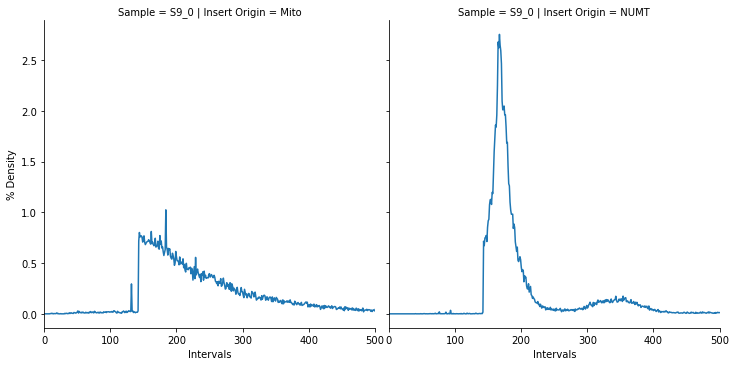

In [14]:
g = sns.relplot(x="Intervals", y='% Density',
            row="Sample",col="Insert Origin",
            data=combinedInserts.query('Sample == "S9_0"'), kind="line", estimator=None)
# g.fig.suptitle("Patient " + name + " Fragment Dist.")
[i.set_xlim(0,500) for i in g.axes_dict.values()]
plt.show()

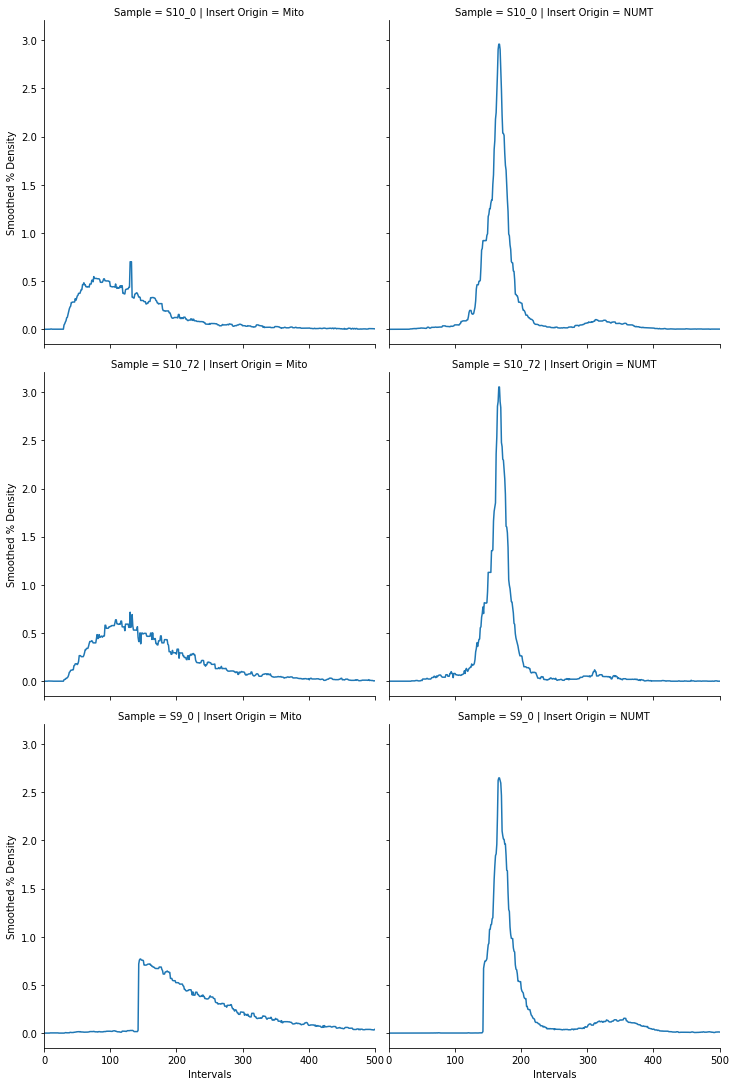

In [13]:
g = sns.relplot(x="Intervals", y='Smoothed % Density',
            row="Sample",col="Insert Origin",
            data=combinedInserts, kind="line", estimator=None)
# g.fig.suptitle("Patient " + name + " Fragment Dist.")
[i.set_xlim(0,500) for i in g.axes_dict.values()]
plt.show()